### KNN -手写数字识别

In [247]:
import numpy as np
# 用于加载图片
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [341]:
# load pci  位图  三维图片
digit = cv2.imread('./nums.bmp')
# # 将彩色图片转为黑白的  降低灰度  数据减少了到了二维
digit = cv2.cvtColor(digit,code = cv2.COLOR_BGR2GRAY)
digit.shape

(195, 241)

In [374]:
## 加载所有图片
# 测试数据
X=[]
for i in range(10):
    for j in range(0,11):
        digit = cv2.imread('./data/%d/%d.bmp'%(i,j))
        # 灰度处理
        m = cv2.cvtColor(digit,code = cv2.COLOR_BGR2GRAY)
        m = m[20:170,20:170]
        X.append(m)
#转换为numpy对象
X = np.array(X)
Y = np.array([i for i in range(10)]*11)
# X AND Y IS ONE TO ONE
# 排序
Y.sort()
# data has prepared done

## 加载数据  处理数据  灰度化处理 

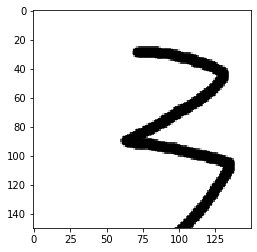

In [375]:
# 显示图片  目前digit是二维数据 高度 宽度，像素（只有一个值） ，用什么颜色表示呢
# 选择黑白  图片show就是黑白
# 
# 画图  随机显示图片
index = np.random.randint(0,110,size=1)[0]
digit = X[index]
plt.imshow(digit,cmap = plt.cm.gray)

## 以上 数据准备完毕 数据进行灰度化处理 降维

## X Y 分割  使用train_test_split算法分割为训练和验证数据

In [376]:
# 模型选择
from sklearn.model_selection import train_test_split

In [377]:
# 分割数据 默认0.25 划分后数据也是一一对应的
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [378]:
#数据不合要求 ，reshape形状改变
#数据不变 -1 即便为倒过来数  三维数据变为二维数据
X_train = X_train.reshape(88,-1)
Y_train = Y_train.reshape(88,-1)
X_train.shape
Y_test.shape

(22,)

In [393]:
## 使用算法训练和预测
# 训练
knn = KNeighborsClassifier(n_neighbors=2)
# 训练数据
knn.fit(X_train,Y_train)

<ipython-input-393-ae48159f3465>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [394]:
# %%time
# 使用算法进行预测
# 算法没见过 剩下的22 个没见过
# 训练是二维  预测也得是二维
X_test = X_test.reshape(22,-1)
# 准确率能否达到100%
Y_ = knn.predict(X_train)
#准确率
knn.score(X_train,Y_train)

0.125

In [395]:
#计算准确率
print((Y_ == Y_train).mean())

0.10472623966942149
